<a href="https://colab.research.google.com/github/cgroba/Data-for-Colab/blob/master/LAS_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install lasio

In [0]:
import lasio
import numpy as np

In [0]:
las = lasio.read("7-ATL-4HB-RJS.las")

In [4]:
las.header

{'Curves': [CurveItem(mnemonic=DEPT, unit=m, value=, descr=DEPTH, original_mnemonic=DEPT, data.shape=(13167,)),
  CurveItem(mnemonic=DEPTH_1, unit=m, value=, descr=DEPTH_1, original_mnemonic=DEPTH_1, data.shape=(13167,)),
  CurveItem(mnemonic=PHI, unit=m3/m3, value=, descr=PHI, original_mnemonic=PHI, data.shape=(13167,)),
  CurveItem(mnemonic=SW, unit=_, value=, descr=SW, original_mnemonic=SW, data.shape=(13167,)),
  CurveItem(mnemonic=VCL, unit=_, value=, descr=VCL, original_mnemonic=VCL, data.shape=(13167,)),
  CurveItem(mnemonic=TVDSS, unit=_, value=, descr=TVDSS, original_mnemonic=TVDSS, data.shape=(13167,))],
 'Other': '',
 'Parameter': [],
 'Version': [HeaderItem(mnemonic=VERS, unit=, value=2.0, descr=),
  HeaderItem(mnemonic=WRAP, unit=, value=NO, descr=)],
 'Well': [HeaderItem(mnemonic=STRT, unit=m, value=1623.5172, descr=),
  HeaderItem(mnemonic=STOP, unit=m, value=3630.0156, descr=),
  HeaderItem(mnemonic=STEP, unit=m, value=0.1524, descr=),
  HeaderItem(mnemonic=NULL, unit=,

In [5]:
las

In [6]:
for curve in las.curves:
         print(curve.mnemonic)
         print(curve.unit)
         print(curve.data)
         print("\n")

DEPT
m
[1623.5172 1623.6696 1623.822  ... 3629.7108 3629.8632 3630.0156]


DEPTH_1
m
[1623.5172119 1623.6695557 1623.8220215 ... 3629.7106934 3629.8632813
 3630.015625 ]


PHI
m3/m3
[nan nan nan ... nan nan nan]


SW
_
[nan nan nan ... nan nan nan]


VCL
_
[nan nan nan ... nan nan nan]


TVDSS
_
[1597.5172119 1597.6695557 1597.8220215 ... 2309.1589355 2309.1643066
 2309.1696777]




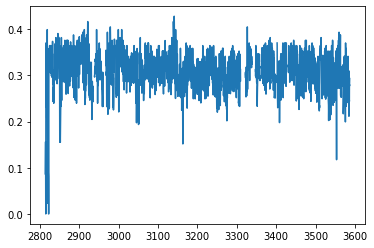

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(las.index, las["PHI"])

In [0]:
df = las.df()

In [9]:
df.head

<bound method NDFrame.head of                DEPTH_1  PHI  SW  VCL        TVDSS
DEPT                                             
1623.5172  1623.517212  NaN NaN  NaN  1597.517212
1623.6696  1623.669556  NaN NaN  NaN  1597.669556
1623.8220  1623.822021  NaN NaN  NaN  1597.822021
1623.9744  1623.974365  NaN NaN  NaN  1597.974365
1624.1268  1624.126831  NaN NaN  NaN  1598.126831
...                ...  ...  ..  ...          ...
3629.4060  3629.406006  NaN NaN  NaN  2309.148193
3629.5584  3629.558350  NaN NaN  NaN  2309.153564
3629.7108  3629.710693  NaN NaN  NaN  2309.158936
3629.8632  3629.863281  NaN NaN  NaN  2309.164307
3630.0156  3630.015625  NaN NaN  NaN  2309.169678

[13167 rows x 5 columns]>

In [10]:
df

,DEPTH_1,PHI,SW,VCL,TVDSS
DEPT,,,,,
1623.5172,1623.517212,NaN,NaN,NaN,1597.517212
1623.6696,1623.669556,NaN,NaN,NaN,1597.669556
1623.8220,1623.822021,NaN,NaN,NaN,1597.822021
1623.9744,1623.974365,NaN,NaN,NaN,1597.974365
1624.1268,1624.126831,NaN,NaN,NaN,1598.126831
...,...,...,...,...,...
3629.4060,3629.406006,NaN,NaN,NaN,2309.148193
3629.5584,3629.558350,NaN,NaN,NaN,2309.153564
3629.7108,3629.710693,NaN,NaN,NaN,2309.158936


In [11]:
df.describe()

,DEPTH_1,PHI,SW,VCL,TVDSS
count,13167.000000,4747.000000,4747.000000,4747.000000,13167.000000
mean,2626.766400,0.306599,0.097393,0.114951,2149.223266
std,579.292186,0.041347,0.045335,0.090909,199.579202
min,1623.517212,0.000100,0.049700,0.000000,1597.517212
25%,2125.141846,0.283400,0.086400,0.034400,2053.794189
50%,2626.766357,0.308300,0.094000,0.111300,2261.412842
75%,3128.390991,0.335100,0.101300,0.174450,2291.505859
max,3630.015625,0.427700,1.000000,0.516900,2309.169678


In [0]:
df['PHI_avg'] = df['PHI'].rolling(int(1 / las.well.STEP.value), center=True).mean()

In [0]:
las.set_data(df)

In [0]:
las.write('example-as-v1.2.las', version=1.2)